<a href="https://colab.research.google.com/github/scienceNH/photo_analytics/blob/main/model_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

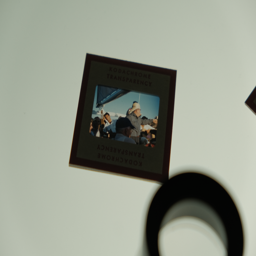

In [13]:
from torchvision.io import read_image
from torchvision.models import resnet50, ResNet50_Weights
import torchvision
import torch

from PIL import ImageFile, Image
# ImageFile.LOAD_TRUNCATED_IMAGES = True

# img = read_image("/DSCF8436.JPG")
img = Image.open('/DSCF8436.JPG')
img = img.resize((256, 256))
img

In [11]:
img = torchvision.transforms.functional.to_tensor(img)


# Step 1: Initialize model with the best available weights
weights = ResNet50_Weights.DEFAULT
model = resnet50(weights=weights)
model.eval()

# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = preprocess(img).unsqueeze(0)

# Step 4: Use the model and print the predicted category
prediction = model(batch).squeeze(0).softmax(0)
class_id = prediction.argmax().item()
score = prediction[class_id].item()
category_name = weights.meta["categories"][class_id]
print(f"{category_name}: {100 * score:.1f}%")

loupe: 48.7%


In [ ]:
model = torchvision.models.resnet50(pretrained=True)
model
# conv1 -> bn1 -> relu -> maxpool -> layer1 -> layer2 -> layer3 -> layer4 -> global average pool -> fc

In [17]:
fc1 = torch.nn.Linear(2048, 9) # 첫 번째 값 -4 ~ 4
fc2 = torch.nn.Linear(2048, 2) # 두 번째 값 on/off

Linear(in_features=2048, out_features=1000, bias=True)

In [19]:
class MyModel(torch.nn.Module):
  def __init__(self, backbone_model):
    self.backbone = backbone_model
    del self.backbone.fc
    
    self.fc1 = torch.nn.Linear(2048, 9) # 첫 번째 값 -4 ~ 4
    self.fc2 = torch.nn.Linear(2048, 2) # 두 번째 값 on/off
  
  def forward(self, x):
    x = self.backbone.conv1(x)
    x = self.backbone.bn1(x)
    x = self.backbone.relu(x)
    x = self.backbone.maxpool(x)
    x = self.backbone.layer1(x)
    x = self.backbone.layer2(x)
    x = self.backbone.layer3(x)
    x = self.backbone.layer4(x)
    x = self.backbone.avgpool(x)

    p1 = self.fc1(x)
    p2 = self.fc2(x)
    ...
    return p1, p2, ...


NameError: ignored